# Virat Kohli : Batting Analysis (2008-2018):
**Virat Kohli** is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.

<img src="https://images.thequint.com/thequint%2F2018-01%2F5d369107-8477-4216-a39d-ad806e1d3a0c%2FVirat-century.jpg?rect=0%2C0%2C4650%2C2616&auto=format%2Ccompress&fmt=webp&w=700&dpr=1.0.jpg" width="500" height="500" />

**Born**: November 5, 1988, Delhi, India

**Team**: India national cricket team

**Sport**: Cricket

**Nationality**: India

**Data Dictionary**
1. RunsScored : Number of Runs scored by Kohli in the match.
2. BallsFaced : Number of Balls Faces by Kohli in the match.
3. BattingPosition : Batting position is Virat Kohli's position on the batting order.
4. Dismissal : How Kohli got out in the match or not out. Caught, NO: Not Out, Bowled, Run out, LBW, Stumped, Hit wicket.
5. Inning : An innings is one of the divisions of a match during which one team takes its turn to bat. Two 1st inning or 2nd inning.
6. Opposition : Name of the Opposition team.
7. Year : Year in which the match was played.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Read Bastman details file
df=pd.read_csv('Batsman.csv')

In [3]:
# View first 5 rows
df.head(5)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [4]:
#Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [5]:
#Shape of the data
df.shape

(208, 7)

In [6]:
#Null Value Check
df.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [7]:
# Descriptive summary
df.describe(include='all')

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


In [8]:
# Descriptive summary for Numeric and Categorical variables


## Q-1 What is the percentage for Kohli being Not Out.
**Make a Pie Chart displaying the distribution of Dismissals**

In [9]:
df['Dismissal'].value_counts(normalize=True)

Caught        0.581731
NO            0.177885
Bowled        0.100962
LBW           0.057692
Run out       0.057692
Stumped       0.019231
Hit wicket    0.004808
Name: Dismissal, dtype: float64

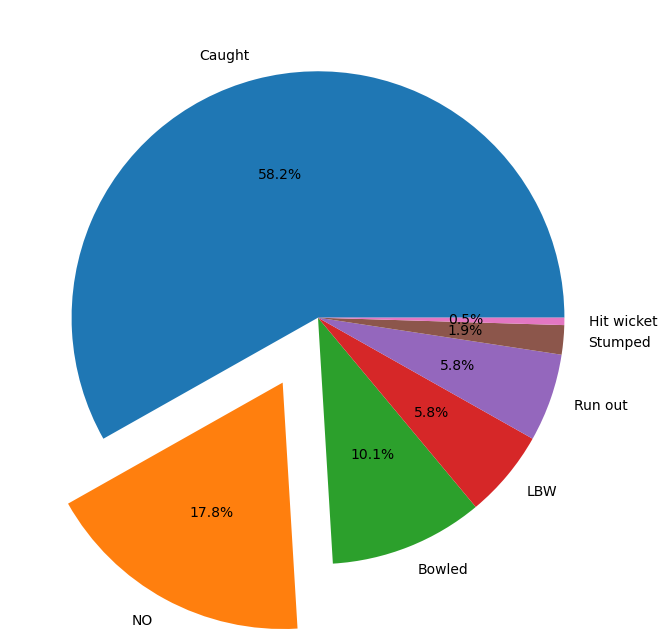

In [10]:
plt.figure(figsize=(8,8))
plt.pie(df['Dismissal'].value_counts(),labels=df['Dismissal'].value_counts().index,autopct='%1.1f%%',explode=[0,0.30,0,0,0,0,0]);

## Q-2 Find the number of times when kohli scored less than or equal to 7 runs?

In [11]:
df[df['RunsScored']<=7].count()

RunsScored         40
BallsFaced         40
BattingPosition    40
Dismissal          40
Inning             40
Opposition         40
Year               40
dtype: int64

In [12]:
183/7

26.142857142857142

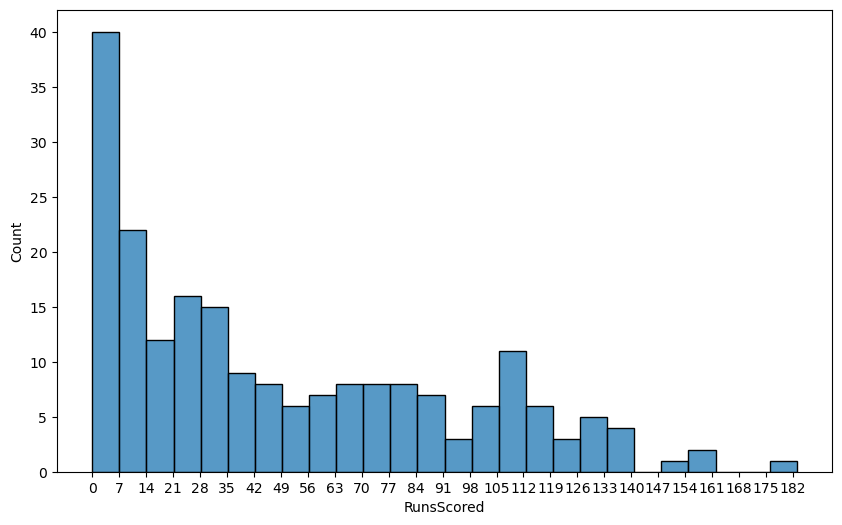

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(x='RunsScored',data=df,bins=26)
plt.xticks(np.arange(0,183,7));

## Q.4 Use Boxplot to tell the IQR( Inter Quartile Range) of runs scored by Kohli?

<AxesSubplot:xlabel='RunsScored'>

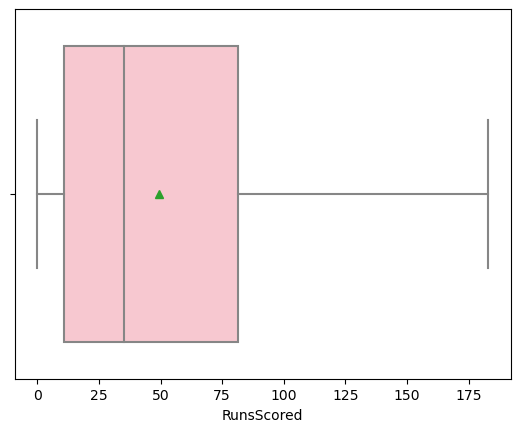

In [14]:
sns.boxplot(x='RunsScored',data=df,showmeans=True,color='pink')

In [15]:
Q1=df['RunsScored'].quantile(0.25)
Q1

10.75

In [16]:
Q3=df['RunsScored'].quantile(0.75)
Q3

81.25

In [17]:
IQR=Q3-Q1
IQR

70.5

## Q. What is the best way that the opposition team bowlers can get Kohli out?

How Kohli got dismissed most of the times?

[Hint: Use countplot]

In [18]:
df['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object')

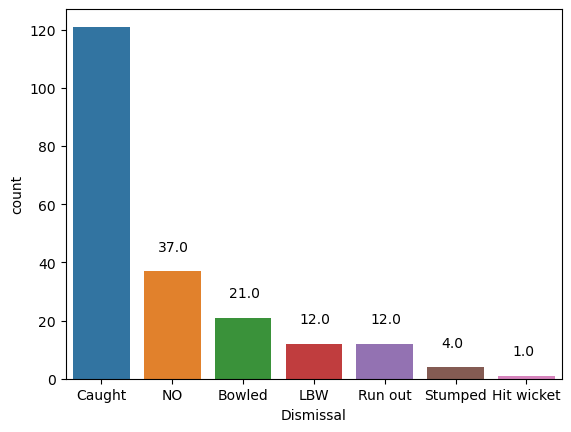

In [19]:
ax=sns.countplot(x='Dismissal',data=df,order=df['Dismissal'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+7));

## Q. Against which opposition team Kohli has played the most in his career?
[Hint: Use Countplot]

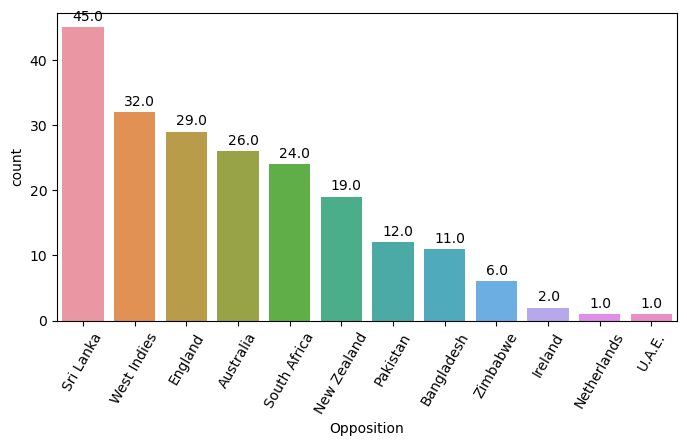

In [21]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Opposition',data=df,order=df['Opposition'].value_counts().index)
plt.xticks(rotation=60)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1));

## Q. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.
[Hint: Stacked Bar Plot]

In [34]:
## Cross Table
ct=pd.crosstab(df['Opposition'],df['Dismissal'],margins=True)

In [36]:
ct.drop('All',inplace=True)

In [1]:
ct.drop('All',axis=1,inplace=True)

NameError: name 'ct' is not defined

In [40]:
ct

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped
Opposition,,,,,,,
Australia,2,18,0,1,3,2,0
Bangladesh,3,3,0,1,3,0,1
England,4,17,1,2,4,0,1
Ireland,0,0,0,0,1,1,0
Netherlands,1,0,0,0,0,0,0
New Zealand,0,16,0,0,3,0,0
Pakistan,2,8,0,0,2,0,0
South Africa,0,16,0,0,5,3,0
Sri Lanka,4,24,0,6,8,3,0


<AxesSubplot:xlabel='Opposition'>

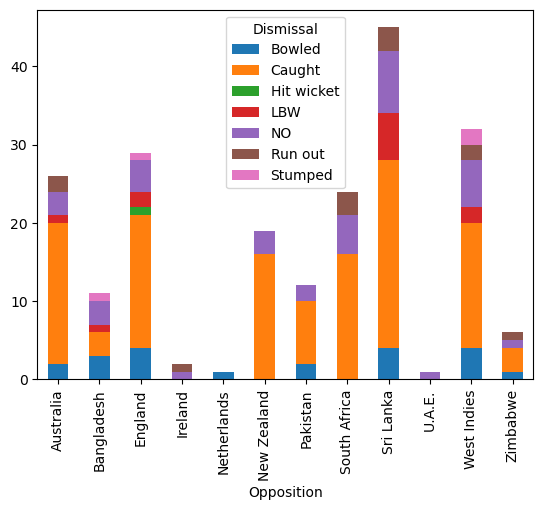

In [42]:
ct.plot.bar(stacked=True)

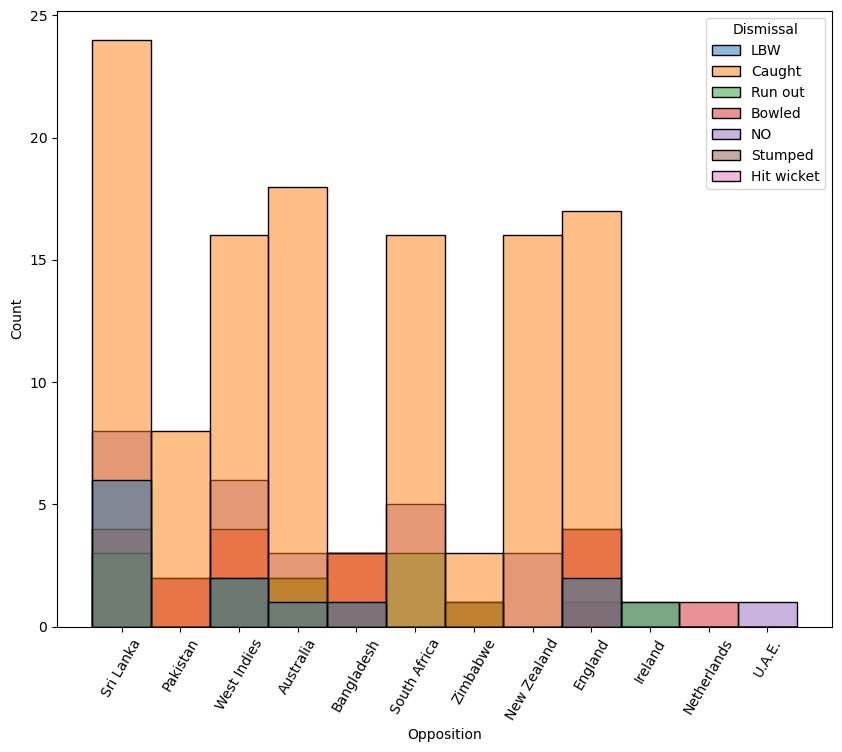

In [47]:
plt.figure(figsize=(10,8))
sns.histplot(x='Opposition',data=df,hue='Dismissal')
plt.xticks(rotation=60);

## Q. Which opposition has Kohli scored most runs against? Find the median score against different oppositions and use a boxplot to represent it?
[Hint: Use barchart & BoxPlot]

<AxesSubplot:xlabel='RunsScored', ylabel='Opposition'>

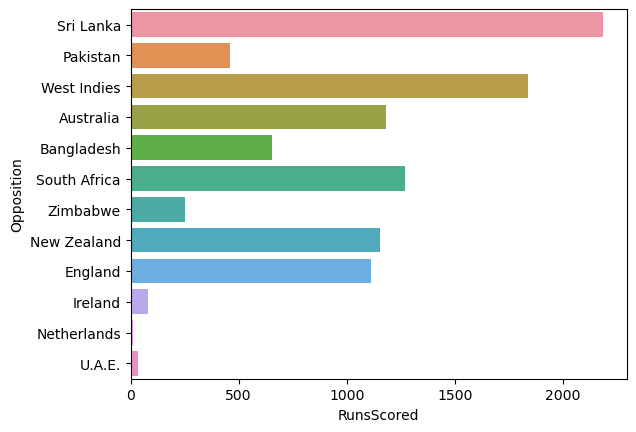

In [48]:
sns.barplot(x='RunsScored',y='Opposition',data=df,ci=None,orient='h',estimator=np.sum)

<AxesSubplot:xlabel='RunsScored', ylabel='Opposition'>

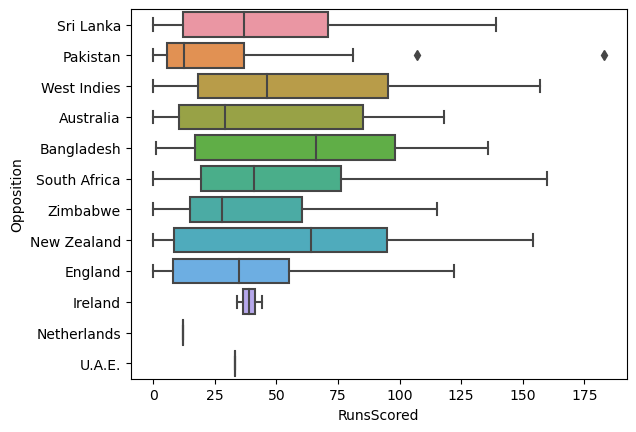

In [50]:
sns.boxplot(x='RunsScored',y='Opposition',data=df)

## Q. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.
[Hint: Use Boxplot]

In [52]:
df.head(1)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008


<AxesSubplot:xlabel='RunsScored', ylabel='Inning'>

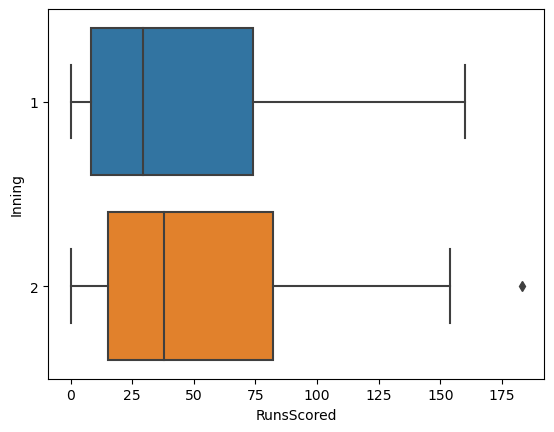

In [53]:
sns.boxplot(x='RunsScored',y='Inning',data=df,orient='h')

## Q. Pre and Post transformation comparison

**It is well known that Kohli started taking fitness much more seriously post an ordinary IPL in 2012. He changed his training regime and eating habits completely, realising the need to transform his body to survive the rigours of playing all three formats.**
<img src="https://cdn.wisden.com/wp-content/uploads/2020/07/Untitled-design-47.png" width="500" height="500" />
<img src= "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSskALcVu6o9iI-7Q_rsehBkQ4PpDN6IAjWwA&usqp=CAU" width="500" height="500" />

**Kohli says it was the absence of fear or respect for him in the opposition's eye that has forced him to change his work ethic
Kohli revealed how working on his fitness has lifted his game after coming back from the Australian tour in 2012
While he considers his idol Tendulkar's skills as a cricketer in a different league, his is a case of pure hard work**

Adding a column giving true for those rows which represent post transformation 

In [56]:
df['post_transform'] = df["Year"]>2012

In [59]:
df.tail()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,post_transform
203,140,107,3,Stumped,2,West Indies,2018,True
204,157,129,3,NO,1,West Indies,2018,True
205,107,119,3,Bowled,2,West Indies,2018,True
206,16,17,3,Caught,1,West Indies,2018,True
207,33,29,3,NO,2,West Indies,2018,True


## Use a Boxplot to compare the runs Scored before and after transformation


<AxesSubplot:xlabel='RunsScored', ylabel='post_transform'>

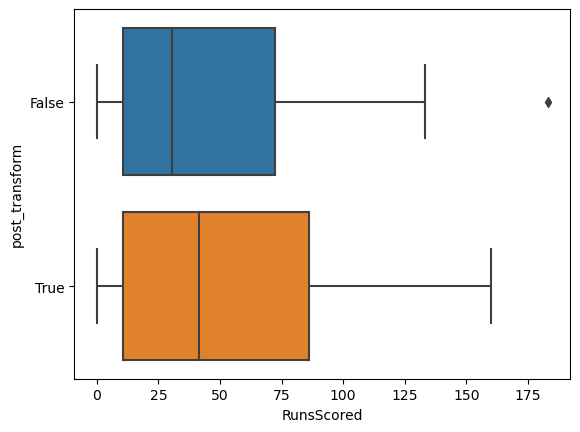

In [60]:
sns.boxplot(x='RunsScored',y='post_transform',data=df,orient='h')

## Use a Boxplot to compare the Balls Faced before and after transformation

<AxesSubplot:xlabel='BallsFaced', ylabel='post_transform'>

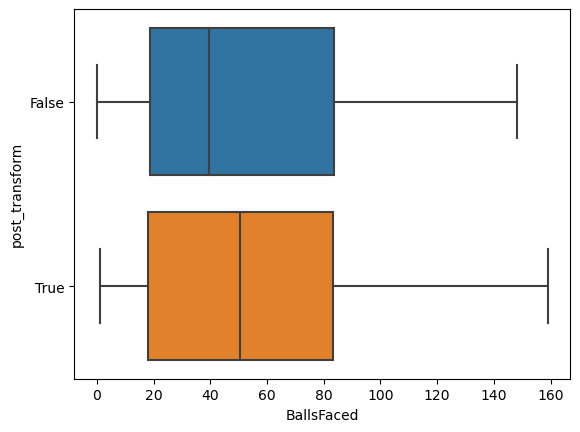

In [61]:
sns.boxplot(x='BallsFaced',y='post_transform',data=df,orient='h')

## Use a Boxplot to compare the runs Scored before and after transformation with Hue as innings(innings wise)


<AxesSubplot:xlabel='RunsScored', ylabel='post_transform'>

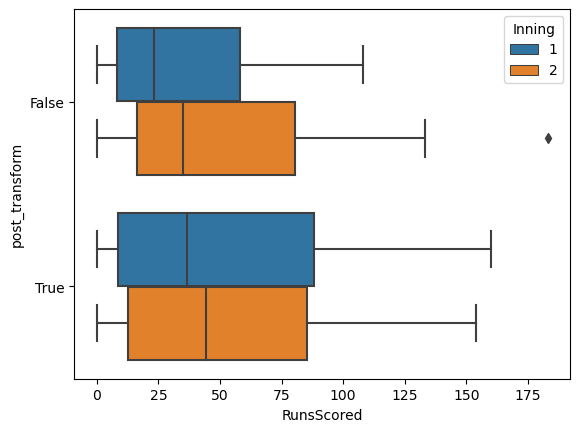

In [62]:
sns.boxplot(x='RunsScored',y='post_transform',data=df,orient='h',hue='Inning')

## Use a bar plot to compare the dismissal patterns before and after transformation.
[Hint: Bar Plot]

<AxesSubplot:xlabel='Dismissal', ylabel='RunsScored'>

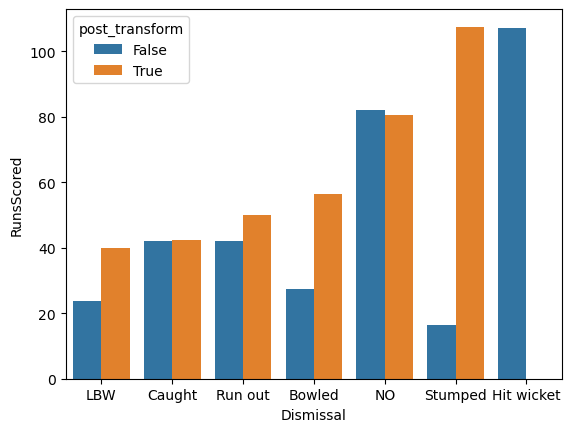

In [64]:
sns.barplot(x='Dismissal',y='RunsScored',hue='post_transform',data=df,ci=None)

## Use Pointplot to Visualize Yearly trend in run scored by Virat Kohli
[Hint: pointplot]

<AxesSubplot:xlabel='Year', ylabel='RunsScored'>

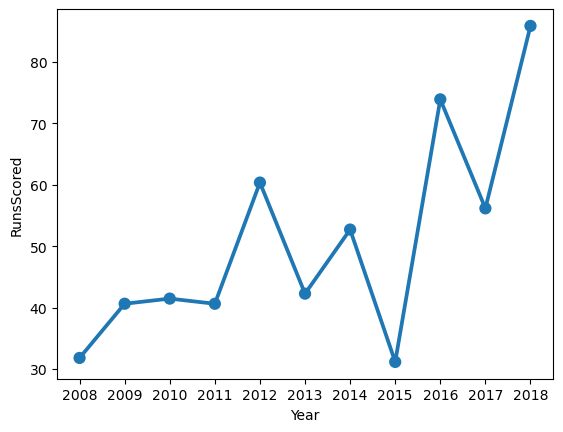

In [65]:
sns.pointplot(x='Year',y='RunsScored',data=df,ci=None)

## Can we say there is a  linear relationship between RunsScored & BallsFaced over different batting positions?
[Hint: Use LMplot]

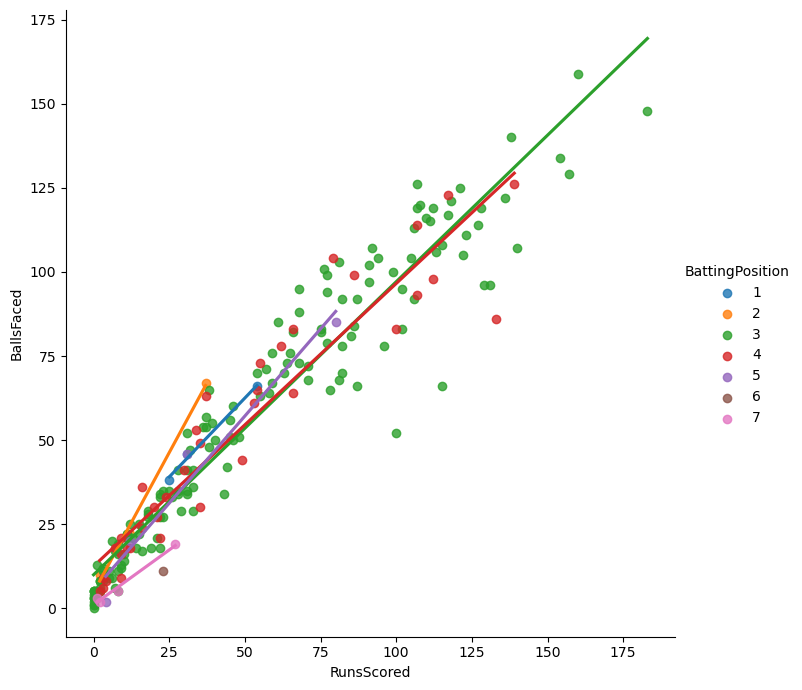

In [66]:
sns.lmplot(x='RunsScored',y='BallsFaced',data=df,ci=None,hue='BattingPosition',height=7)

## How the batting position has changed with different oppositions yearly?
[Hint: FacetGrid]

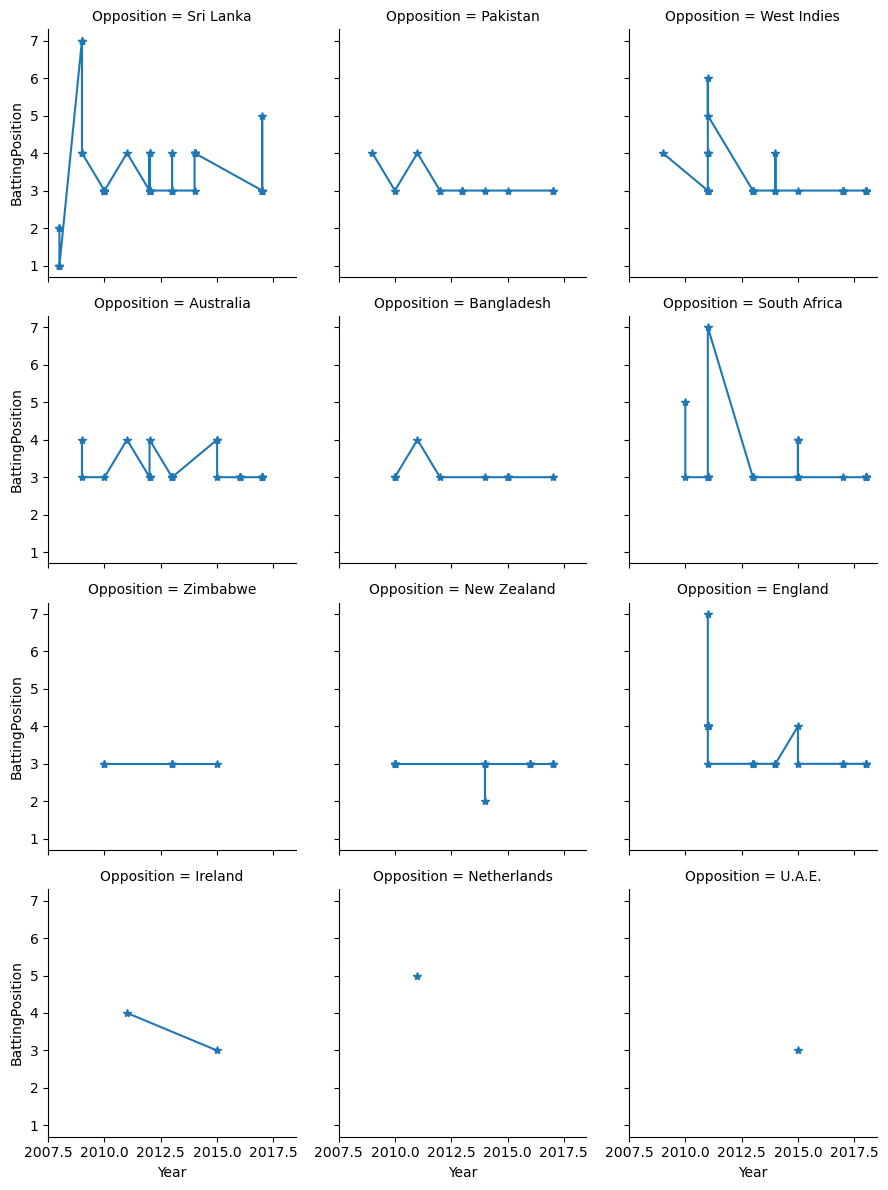

In [70]:
g=sns.FacetGrid(df,col='Opposition',col_wrap=3)
g=g.map(plt.plot,'Year','BattingPosition',marker='*')

                                             **Happy learning**